In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import ast
warnings.filterwarnings('ignore')
#import libraries

In [69]:
df= pd.read_csv('exploratory_data.csv')
df.head()

,student_number,ac_ind,ac_count,ac_gpa,overall_gpa,days_attended,days_absent,school_membership,percent_days_attended,current_grade,...,composite_score,english_score,math_score,reading_score,science_score,writing_score,teachers_had,teacher_count,schools_attended,school_count
0,382716321,0.0,0.0,0.000,3.879,172,8,180,95.56,10.0,...,17.0,15.0,21.0,14.0,16.0,7.0,"[64123.0, 77885.0, 23055.0, 692333.0, 541913.0...",25.0,"[706.0, 703.0]",2.0
1,382716321,0.0,0.0,0.000,3.879,172,8,180,95.56,10.0,...,17.0,15.0,21.0,14.0,16.0,7.0,"[64123.0, 77885.0, 23055.0, 692333.0, 541913.0...",25.0,"[706.0, 703.0]",2.0
2,382716321,0.0,0.0,0.000,3.908,120,0,120,100.00,11.0,...,17.0,15.0,21.0,14.0,16.0,7.0,"[64123.0, 77885.0, 23055.0, 692333.0, 541913.0...",25.0,"[706.0, 703.0]",2.0
3,382716321,0.0,0.0,0.000,3.908,120,0,120,100.00,11.0,...,17.0,15.0,21.0,14.0,16.0,7.0,"[64123.0, 77885.0, 23055.0, 692333.0, 541913.0...",25.0,"[706.0, 703.0]",2.0
4,382716324,1.0,3.0,3.111,3.603,172,8,180,95.56,11.0,...,20.0,19.0,20.0,21.0,18.0,NaN,"[584998.0, 572781.0, 75422.0, 453233.0, 556156...",26.0,"[706.0, 703.0]",2.0


In [70]:
df['schools_attended'].value_counts()
#See different combinations of 703, 706

,count
schools_attended,
[705.0],7787
[702.0],6447
[706.0],5067
[703.0],3527
"[706.0, 703.0]",2049
...,...
"[166.0, 406.0]",1
"[170.0, 156.0, 406.0, 706.0]",1
"[106.0, 166.0, 406.0]",1


In [71]:
#This section helps split the school codes better

# Ensure 'schools_attended' is stored as a list, handling NaN values safely
def safe_convert(value):
    if isinstance(value, str):  # If stored as a string, convert it to a list
        try:
            return ast.literal_eval(value)  # Safer than eval()
        except (SyntaxError, ValueError):
            return []  # Return an empty list if conversion fails
    elif isinstance(value, list):
        return value  # Already a list, return as is
    else:
        return []  # Return an empty list for NaN or other unexpected types

df["schools_attended"] = df["schools_attended"].apply(safe_convert)

# Filter the DataFrame where 703 or 706 is in the list of schools attended
filtered_df = df[df["schools_attended"].apply(lambda x: any(school in x for school in [703.0, 706.0]))]



In [20]:
#get more details about the dataset
filtered_df.info()
filtered_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 32466 entries, 0 to 68258
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_number         32466 non-null  int64  
 1   ac_ind                 32466 non-null  float64
 2   ac_count               32466 non-null  float64
 3   ac_gpa                 32466 non-null  float64
 4   overall_gpa            32466 non-null  float64
 5   days_attended          32466 non-null  int64  
 6   days_absent            32466 non-null  int64  
 7   school_membership      32466 non-null  int64  
 8   percent_days_attended  31409 non-null  float64
 9   current_grade          32466 non-null  float64
 10  scram_membership       3264 non-null   float64
 11  regular_percent        3264 non-null   float64
 12  environment            3264 non-null   object 
 13  is_one_percent         407 non-null    object 
 14  extended_school_year   268 non-null    object 
 15  gender 

,student_number,ac_ind,ac_count,ac_gpa,overall_gpa,days_attended,days_absent,school_membership,percent_days_attended,current_grade,...,ell_entry_date,first_enroll_us,composite_score,english_score,math_score,reading_score,science_score,writing_score,teacher_count,school_count
count,3.246600e+04,32466.000000,32466.000000,32466.000000,32466.000000,32466.000000,32466.000000,32466.000000,31409.000000,32466.000000,...,0.0,0.0,22438.000000,22438.000000,22434.000000,22438.000000,22438.000000,2401.000000,32114.000000,32114.000000
mean,6.013034e+08,0.423520,1.740652,1.428031,3.283799,162.127949,4.140116,166.268065,96.604200,10.482320,...,NaN,NaN,21.179740,20.272974,20.745431,21.944692,21.198948,6.631820,33.794513,1.956156
std,5.753054e+08,0.494124,2.660144,1.788793,0.780309,39.282630,16.248988,41.659422,6.547259,1.051871,...,NaN,NaN,5.283369,6.265433,5.233457,6.480432,5.229569,2.070681,13.273468,0.856362
min,3.827163e+08,0.000000,0.000000,0.000000,0.000000,0.000000,-180.000000,0.000000,0.000000,9.000000,...,NaN,NaN,10.000000,5.000000,7.000000,6.000000,7.000000,2.000000,1.000000,1.000000
25%,3.827645e+08,0.000000,0.000000,0.000000,2.881000,169.000000,0.000000,178.000000,95.560000,10.000000,...,NaN,NaN,17.000000,15.000000,16.000000,17.000000,18.000000,6.000000,24.000000,1.000000
50%,3.827780e+08,0.000000,0.000000,0.000000,3.542000,175.000000,3.000000,180.000000,98.310000,10.000000,...,NaN,NaN,21.000000,20.000000,20.000000,22.000000,21.000000,7.000000,34.000000,2.000000
75%,3.828117e+08,1.000000,3.000000,3.667000,3.922750,179.000000,7.000000,180.000000,100.000000,11.000000,...,NaN,NaN,25.000000,24.000000,25.000000,26.000000,24.000000,8.000000,45.000000,3.000000
max,2.118400e+09,1.000000,17.000000,4.000000,4.000000,180.000000,92.000000,189.000000,375.000000,12.000000,...,NaN,NaN,36.000000,36.000000,36.000000,36.000000,36.000000,50.000000,72.000000,5.000000


In [21]:

#Compare attendance against factors such as race, gender, and immigrant status
group1_stats = filtered_df.groupby('amerindian_alaskan')['percent_days_attended'].mean()
group2_stats = filtered_df.groupby('asian')['percent_days_attended'].mean()
group3_stats = filtered_df.groupby('black_african_amer')['percent_days_attended'].mean()
group4_stats = filtered_df.groupby('hawaiian_pacific_isl')['percent_days_attended'].mean()
group5_stats = filtered_df.groupby('white')['percent_days_attended'].mean()
group6_stats = filtered_df.groupby('immigrant')['percent_days_attended'].mean()
group7_stats = filtered_df.groupby('gender')['percent_days_attended'].mean()


# Print the results
print("Group 1 Statistics:\n", group1_stats)
print("\nGroup 2 Statistics:\n", group2_stats)
print("\nGroup 3 Statistics:\n", group3_stats)
print("Group 4 Statistics:\n", group4_stats)
print("\nGroup 5 Statistics:\n", group5_stats)
print("\nGroup 6 Statistics:\n", group6_stats)
print("Group 7 Statistics:\n", group7_stats)
# ... print other group statistics



Group 1 Statistics:
 amerindian_alaskan
N    96.696836
Y    95.328905
Name: percent_days_attended, dtype: float64

Group 2 Statistics:
 asian
N    96.608312
Y    96.371777
Name: percent_days_attended, dtype: float64

Group 3 Statistics:
 black_african_amer
N    96.600071
Y    96.892140
Name: percent_days_attended, dtype: float64
Group 4 Statistics:
 hawaiian_pacific_isl
N    96.626107
Y    93.817633
Name: percent_days_attended, dtype: float64

Group 5 Statistics:
 white
N    95.526507
Y    96.699344
Name: percent_days_attended, dtype: float64

Group 6 Statistics:
 immigrant
N    96.608110
Y    96.003202
Name: percent_days_attended, dtype: float64
Group 7 Statistics:
 gender
F    96.557953
M    96.650411
U    94.751250
Name: percent_days_attended, dtype: float64


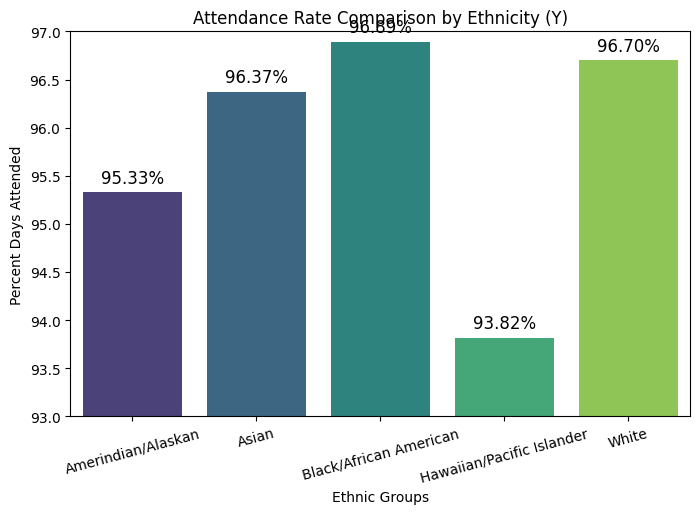

In [22]:
#Chart of above analysis
ethnicity_attendance = {
    "Amerindian/Alaskan": group1_stats.get("Y", None),
    "Asian": group2_stats.get("Y", None),
    "Black/African American": group3_stats.get("Y", None),
    "Hawaiian/Pacific Islander": group4_stats.get("Y", None),
    "White": group5_stats.get("Y", None),
}

# Convert to a DataFrame for easier manipulation
df_ethnicity = pd.DataFrame(list(ethnicity_attendance.items()), columns=["Ethnicity", "Percent Days Attended"])

# Create the bar plot
plt.figure(figsize=(8,5))
sns.barplot(data=df_ethnicity, x="Ethnicity", y="Percent Days Attended", palette="viridis")

# Add labels and title
plt.xlabel("Ethnic Groups")
plt.ylabel("Percent Days Attended")
plt.title("Attendance Rate Comparison by Ethnicity (Y)")
plt.ylim(93, 97)  # Adjust y-axis for clarity

# Show exact values on top of bars
for i, row in df_ethnicity.iterrows():
    plt.text(i, row["Percent Days Attended"] + 0.1, f"{row['Percent Days Attended']:.2f}%", ha='center', fontsize=12)

# Show the plot
plt.xticks(rotation=15)
plt.show()



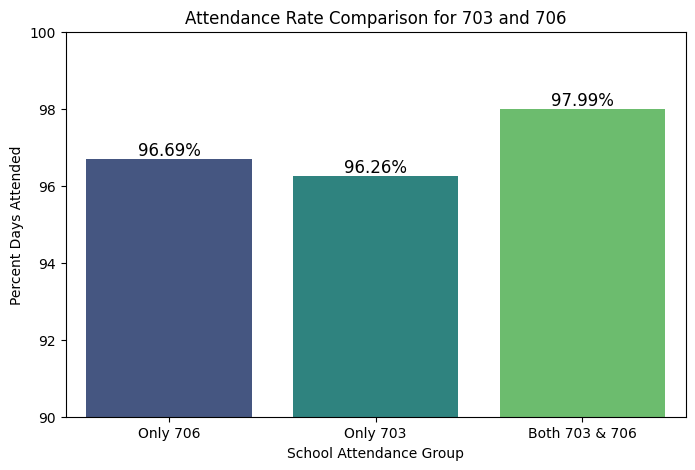

In [23]:
#Chart comparing school attendance
import matplotlib.pyplot as plt
import seaborn as sns

# Categorize students into three groups
only_706 = df[df["schools_attended"].apply(lambda x: 706.0 in x and 703.0 not in x)]
only_703 = df[df["schools_attended"].apply(lambda x: 703.0 in x and 706.0 not in x)]
both_703_706 = df[df["schools_attended"].apply(lambda x: 703.0 in x and 706.0 in x)]

# Calculate average percent days attended for each group
attendance_rates = {
    "Only 706": only_706["percent_days_attended"].mean(),
    "Only 703": only_703["percent_days_attended"].mean(),
    "Both 703 & 706": both_703_706["percent_days_attended"].mean()
}

# Convert to DataFrame for plotting
df_attendance = pd.DataFrame(list(attendance_rates.items()), columns=["Group", "Percent Days Attended"])

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_attendance, x="Group", y="Percent Days Attended", palette="viridis")

# Add labels and title
plt.xlabel("School Attendance Group")
plt.ylabel("Percent Days Attended")
plt.title("Attendance Rate Comparison for 703 and 706")

# Show exact values on top of bars
for i, row in df_attendance.iterrows():
    plt.text(i, row["Percent Days Attended"] + 0.1, f"{row['Percent Days Attended']:.2f}%", ha='center', fontsize=12)

# Show the plot
plt.ylim(90, 100)  # Adjusting y-axis for clarity
plt.show()


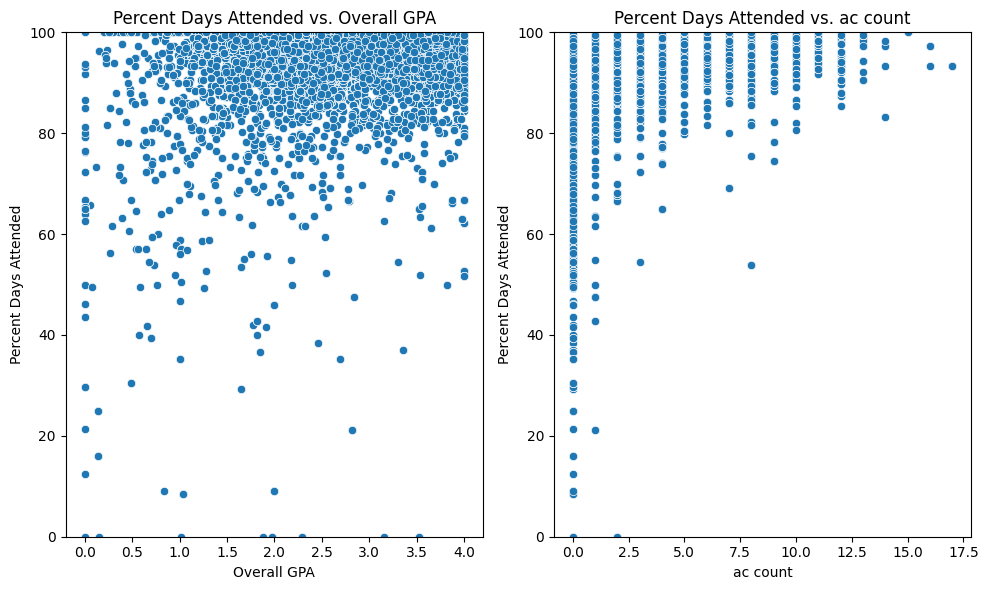

In [24]:
#Additional Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

plt.figure(figsize=(10, 6))

# Scatter plot for 'overall_gpa' vs. 'percent_days_attended'
plt.subplot(1, 2, 1)
sns.scatterplot(x='overall_gpa', y='percent_days_attended', data=filtered_df)
plt.title('Percent Days Attended vs. Overall GPA')
plt.xlabel('Overall GPA')
plt.ylabel('Percent Days Attended')
plt.ylim(0, 100)  # Set y-axis limits

# Scatter plot for 'schools_attended' vs. 'percent_days_attended'
plt.subplot(1, 2, 2)
sns.scatterplot(x='ac_count', y='percent_days_attended', data=filtered_df)
plt.title('Percent Days Attended vs. ac count')
plt.xlabel('ac count')
plt.ylabel('Percent Days Attended')
plt.ylim(0, 100)  # Set y-axis limits

plt.tight_layout()
plt.show()



More analysis


In [25]:
#part time students analysis begins here -------------------------------------------------------------
df['part_time_home_school'].value_counts()

,count
part_time_home_school,
S,391
H,71
P,2


In [65]:
only_706 = filtered_df[filtered_df["schools_attended"].apply(lambda x: 706.0 in x and 703.0 not in x)]
only_703 = filtered_df[filtered_df["schools_attended"].apply(lambda x: 703.0 in x and 706.0 not in x)]

In [81]:
#District Wide
#replace null values as strings
df['part_time_home_school'] = df['part_time_home_school'].astype(str)

#part time home school group
df['group'] = df['part_time_home_school'].apply(
    lambda x: 'part_time_home_school' if isinstance(x, str) and any(char in x for char in ['S', 'H', 'P']) else 'full_time_student'
)

#split up the groups
home_school = df[df['group'] == 'home_school']
full_time_student = df[df['group'] == 'full_time_student']

#-------------------------------------------------------------------------
only_706['part_time_home_school'] = only_706['part_time_home_school'].astype(str)

#part time home school group
only_706['group'] = only_706['part_time_home_school'].apply(
    lambda x: 'part_time_home_school' if isinstance(x, str) and any(char in x for char in ['S', 'H', 'P']) else 'full_time_student'
)

#split up the groups
home_school = only_706[only_706['group'] == 'home_school']
full_time_student = only_706[only_706['group'] == 'full_time_student']

#-------------------------------------------------------------------------------

only_703['part_time_home_school'] = only_703['part_time_home_school'].astype(str)

#part time home school group
only_703['group'] = only_703['part_time_home_school'].apply(
    lambda x: 'part_time_home_school' if isinstance(x, str) and any(char in x for char in ['S', 'H', 'P']) else 'full_time_student'
)

#split up the groups
home_school = only_703[only_703['group'] == 'home_school']
full_time_student = only_703[only_703['group'] == 'full_time_student']


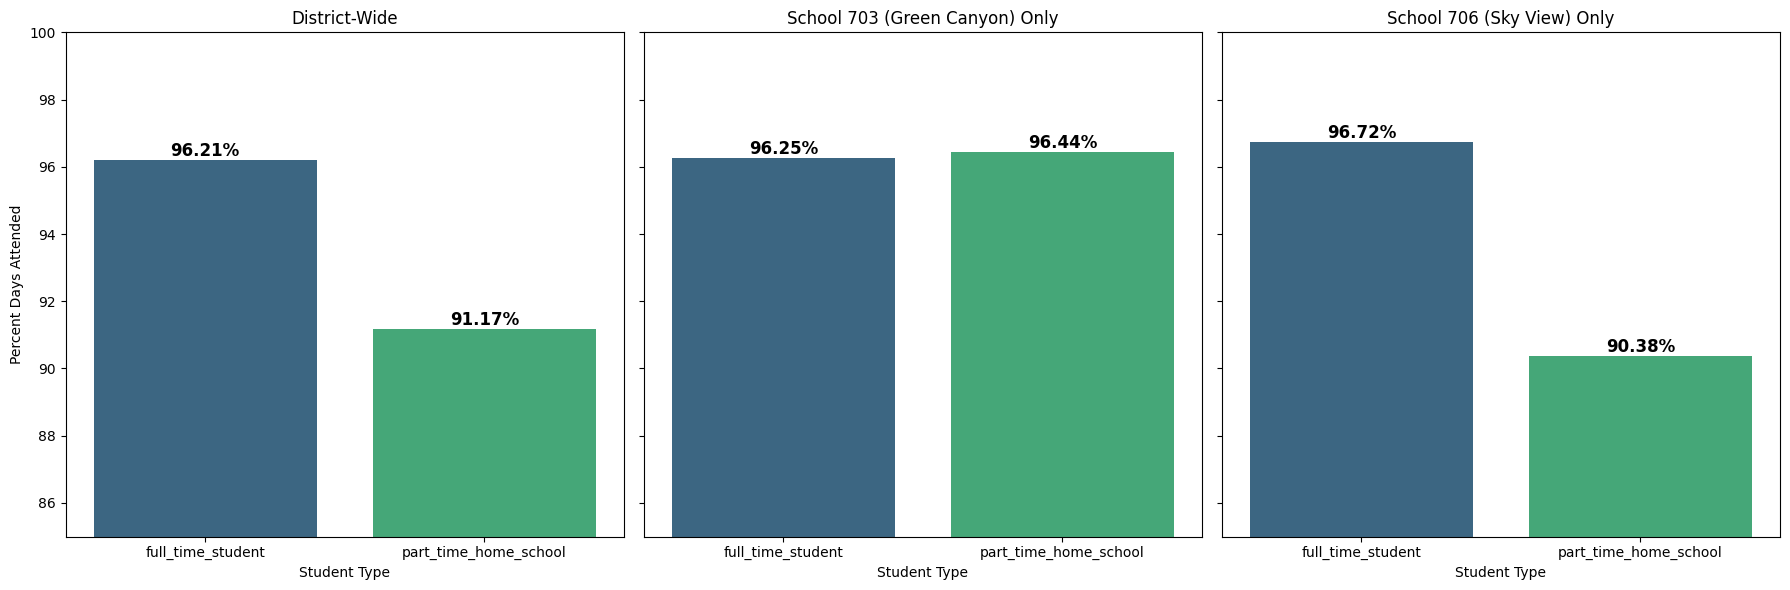

In [89]:
#list of dataFrames
dataframes = [df, only_703, only_706]
titles = ["District-Wide", "School 703 (Green Canyon) Only", "School 706 (Sky View) Only"]

#create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, (data, title) in enumerate(zip(dataframes, titles)):
    ax = sns.barplot(x='group', y='percent_days_attended', data=data, ci=None, palette="viridis", ax=axes[i])

    #add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

    #customize subplot
    ax.set_title(title)
    ax.set_xlabel("Student Type")
    ax.set_ylabel("Percent Days Attended" if i == 0 else "")
    ax.set_ylim(85, 100)

plt.tight_layout()
plt.show()

Above in green are the students who are enrolled for only part of the day.(H "Home", P "Private", S "Stable")

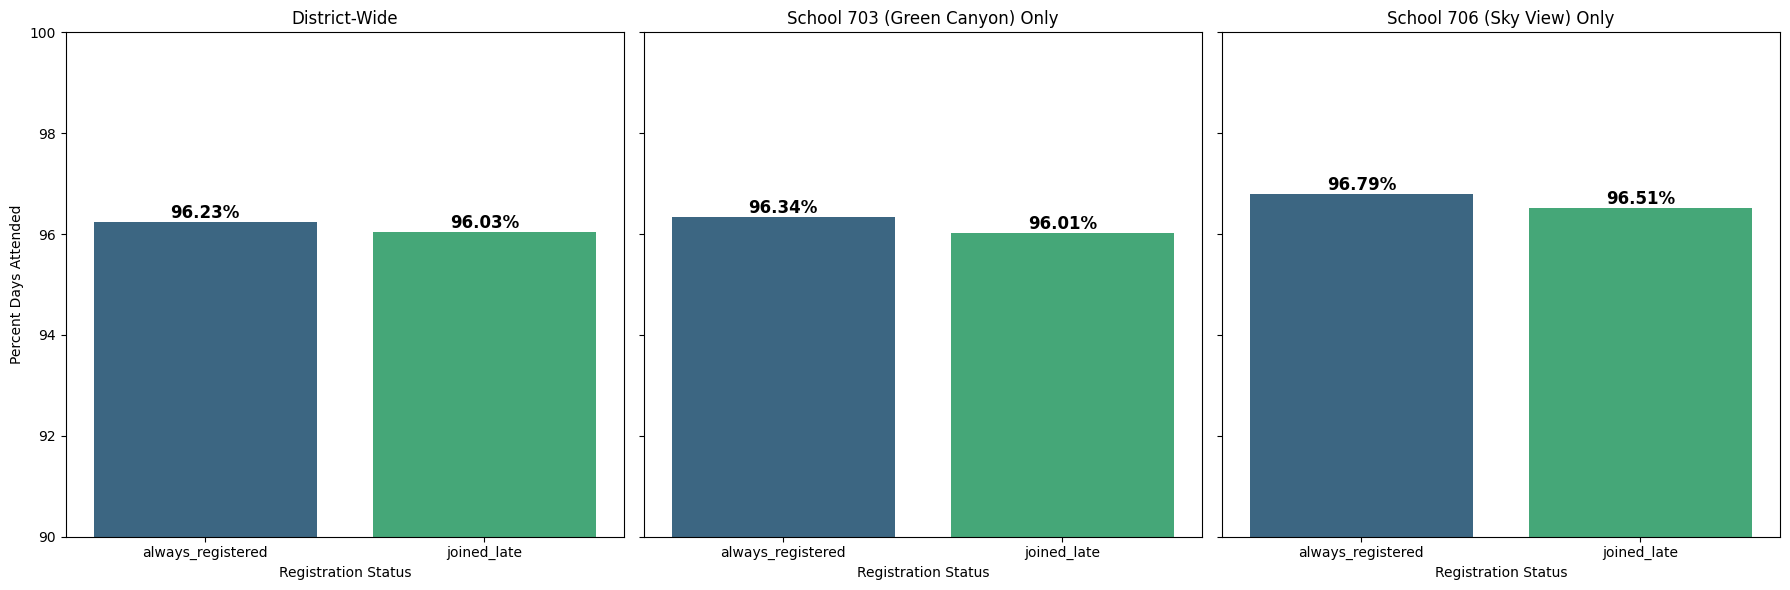

In [88]:
#registration status (if they joined late or not, school_membership != 180)
df['registration_status'] = df['school_membership'].apply(
    lambda x: 'always_registered' if x == 180 else 'joined_late'
)

only_703['registration_status'] = only_703['school_membership'].apply(
    lambda x: 'always_registered' if x == 180 else 'joined_late'
)

only_706['registration_status'] = only_706['school_membership'].apply(
    lambda x: 'always_registered' if x == 180 else 'joined_late'
)


#list of DataFrames
dataframes = [df, only_703, only_706]
titles = ["District-Wide", "School 703 (Green Canyon) Only", "School 706 (Sky View) Only"]

#create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, (data, title) in enumerate(zip(dataframes, titles)):
    ax = sns.barplot(x='registration_status', y='percent_days_attended', data=data, ci=None, palette="viridis", ax=axes[i])

    #add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

    #customize subplot
    ax.set_title(title)
    ax.set_xlabel("Registration Status")
    ax.set_ylabel("Percent Days Attended" if i == 0 else "")
    ax.set_ylim(90, 100)

plt.tight_layout()
plt.show()



Above in green are students who joined the district after the school year started. (school membership is less than 180 days)

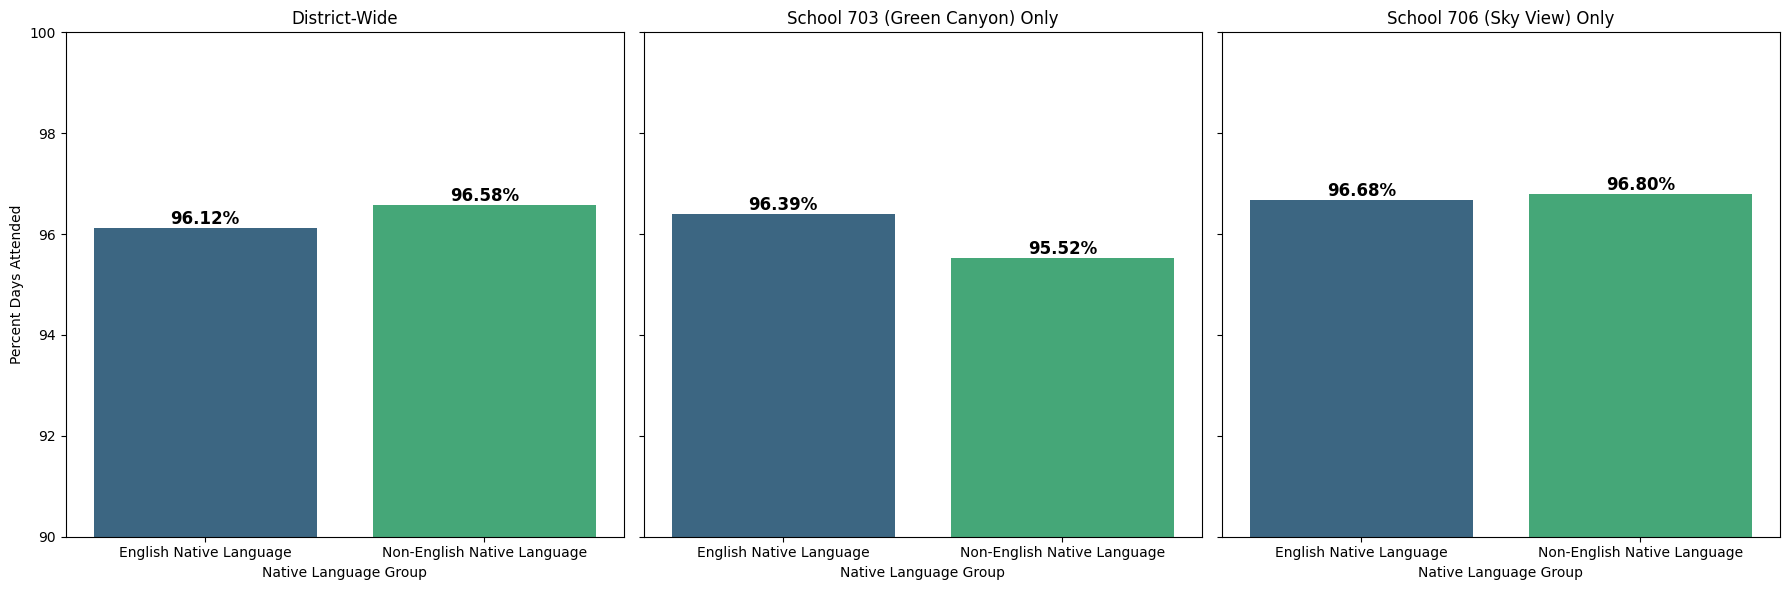

In [87]:
#create native language group column
only_706['native_language_group'] = only_706['ell_native_language'].apply(
    lambda x: 'English Native Language' if x == 'ENG' else 'Non-English Native Language'
)

only_703['native_language_group'] = only_703['ell_native_language'].apply(
    lambda x: 'English Native Language' if x == 'ENG' else 'Non-English Native Language'
)

df['native_language_group'] = df['ell_native_language'].apply(
    lambda x: 'English Native Language' if x == 'ENG' else 'Non-English Native Language'
)

#list of DataFrames and their titles
dataframes = [df, only_703, only_706]
titles = ["District-Wide", "School 703 (Green Canyon) Only", "School 706 (Sky View) Only"]

#create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, (data, title) in enumerate(zip(dataframes, titles)):
    ax = sns.barplot(x='native_language_group', y='percent_days_attended', data=data, ci=None, palette='viridis', ax=axes[i])

    #add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

    #customize subplot
    ax.set_title(title)
    ax.set_xlabel("Native Language Group")
    ax.set_ylabel("Percent Days Attended" if i == 0 else "")
    ax.set_ylim(90, 100)

plt.tight_layout()
plt.show()


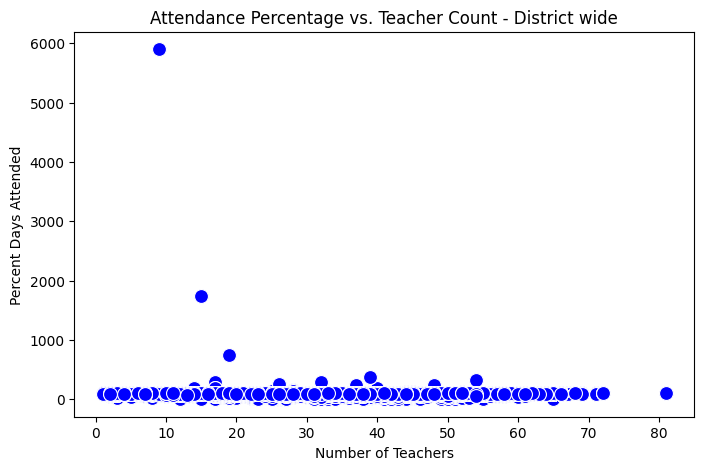

In [86]:
#create scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['teacher_count'], y=df['percent_days_attended'], color='blue', s=100)

#customize the plot
plt.xlabel("Number of Teachers")
plt.ylabel("Percent Days Attended")
plt.title("Attendance Percentage vs. Teacher Count - District wide")

#show the plot
plt.show()